# Student Performance Indicator

### Life Cycle if Machine Learning Project

1. Understanding the problem
2. Data Collection
3. Data checks to perform
4. Exploratory Data Analysis
5. Data Pre-processing
6. Model Training
7. Choose Best Model

## 1) Problem Statement

This project understands how the students's performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental level of education, Lunch and Test preparation course.
 

## 2) Data Collection 
Dataset Source:- 
The data consists of 8 columns and 1000 rows.

## 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read The Dataset

In [2]:
df=pd.read_csv('data/stud.csv')

## Show to 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape Of The Data

In [4]:
df.shape

(1000, 8)

## 2.2 Dataset information
will write after complete project

## 3. Data Checks To Perform
1. Check Missing values
2. Check data type
3. Check the number of unique values of each column
4. Check statistics of the data
5. Check various categories present in the different categorical columns

## 3.1 Check Missing values 

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No Missing values in this dataset

## 3.2 Check for duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicated values 

## 3.3 Check Data Types

In [11]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of values of each column

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.5 Check stats

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3.7 Exploring data

In [16]:
print("categorical in 'gender' variable:    ", end=" ")
print(df['gender'].unique())

print("categorical in 'race/ethnicity' variable:    ", end=" ")
print(df['race/ethnicity'].unique())

print("categorical in 'parental level of education' variable:    ", end=" ")
print(df['parental level of education'].unique())

print("categorical in 'lunch' variable:    ", end=" ")
print(df['lunch'].unique())

print("categorical in 'test preparation course' variable:    ", end=" ")
print(df['test preparation course'].unique())

categorical in 'gender' variable:     ['female' 'male']
categorical in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categorical in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorical in 'lunch' variable:     ['standard' 'free/reduced']
categorical in 'test preparation course' variable:     ['none' 'completed']


In [19]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [18]:
## define numerical and categorical data
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes == 'O']

## print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 3.8 Adding columns "Total score" and "Average"

In [20]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Lets check how many students got full marks in each subject

In [21]:
reading_full=df[df['reading score'] == 100]['average'].count()
writing_full=df[df['writing score'] == 100]['average'].count()
math_full=df[df['math score'] == 100]['average'].count()

print(f'Number of students with full score in Maths: {math_full}')
print(f'Number of students with full score in Reading: {reading_full}')
print(f'Number of students with full score in Writing: {writing_full}')

Number of students with full score in Maths: 7
Number of students with full score in Reading: 17
Number of students with full score in Writing: 14


## 4. Exploring Data (visualization)

## 4.1 Visualization average score distribution to make some conclusion.

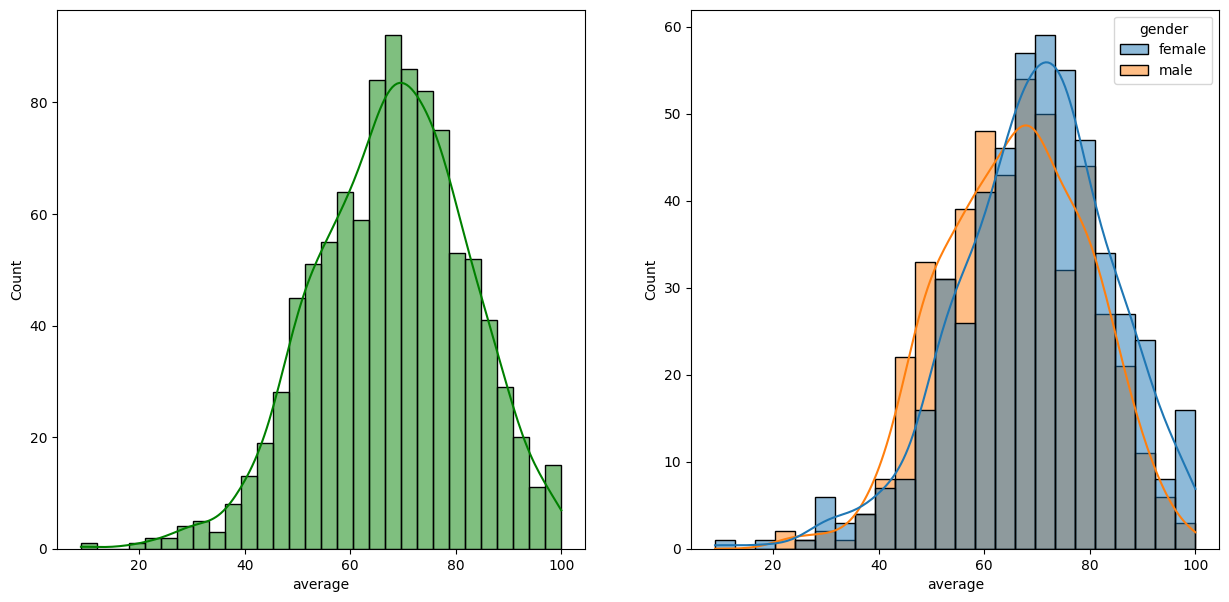

In [24]:
## Histogram and KDE
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

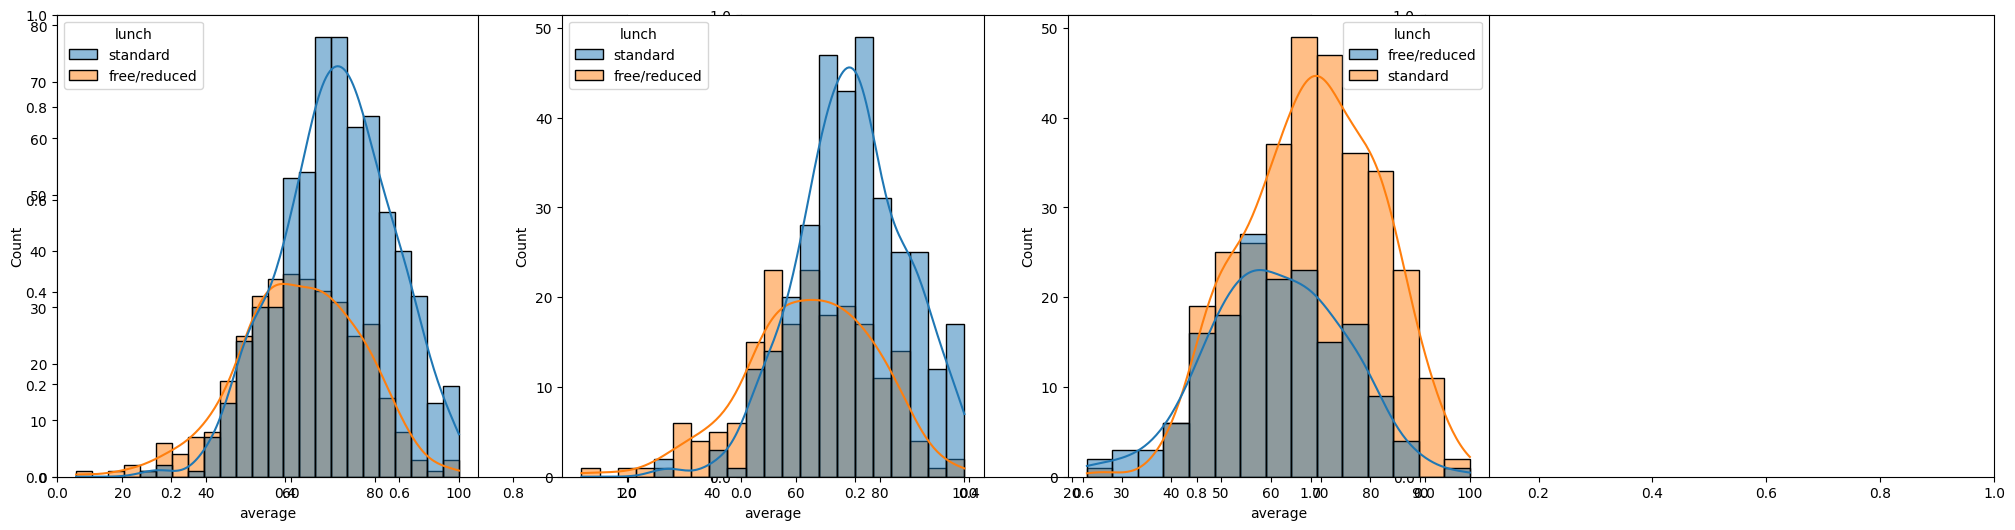

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

standard luunch helps perform well in exams independent of gender

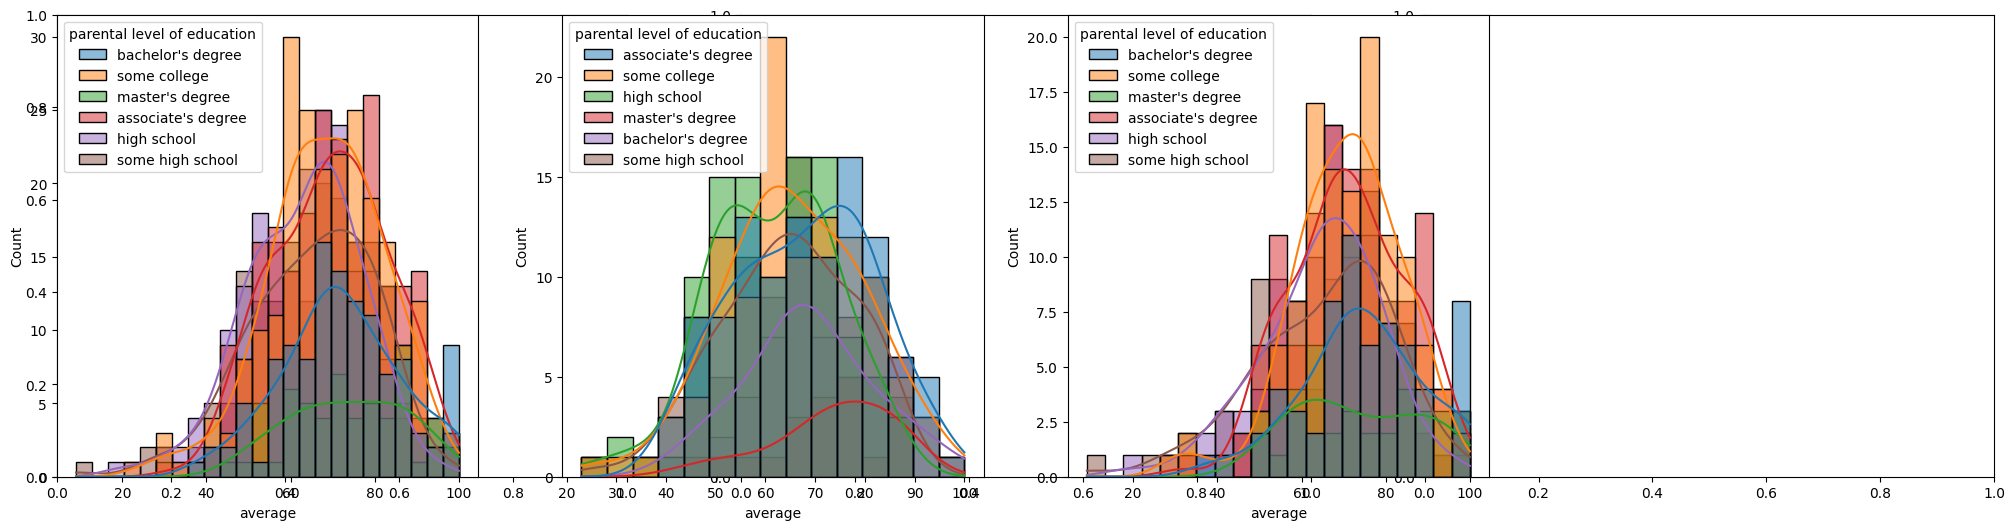

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.show()


In general parental level of eductaion doesnt help students
in 2nd plot, parents having higher education help their male child tend to perform well in exam
in 3rd plot there is no effect of parental education on female children

## 4.2 Maximum score of students in all three subjects

<Axes: title={'center': 'Writing Scores'}, ylabel='writing score'>

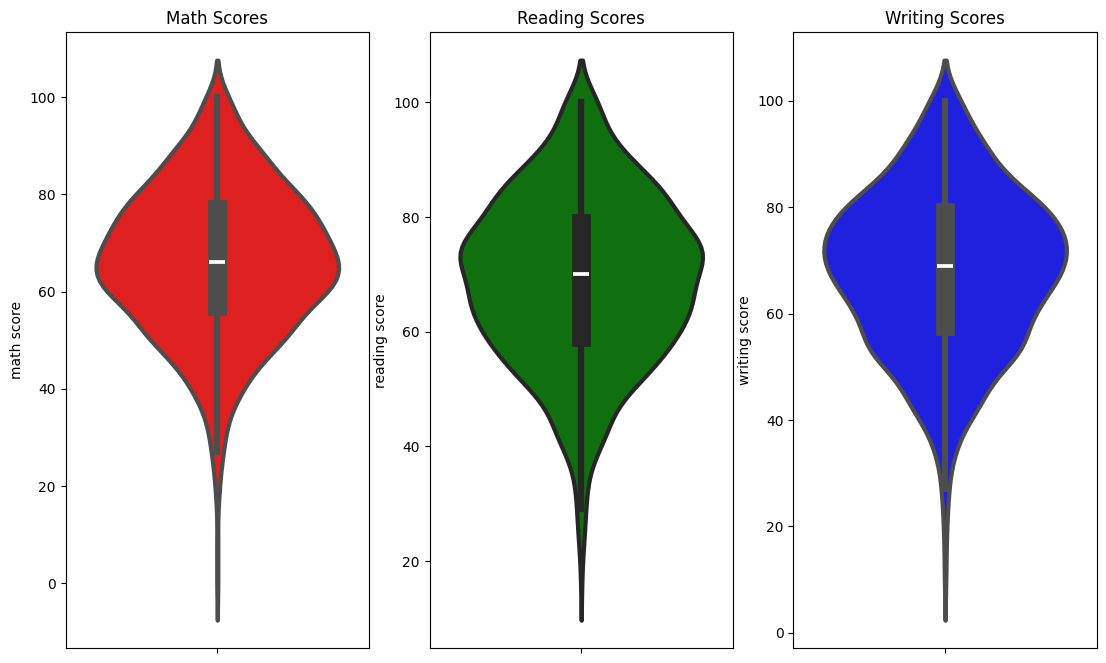

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

Most of the students score between 60-80 in maths but b/w 50=80 in other two subjects

## 4.3 Multivariate analysis using pieplot

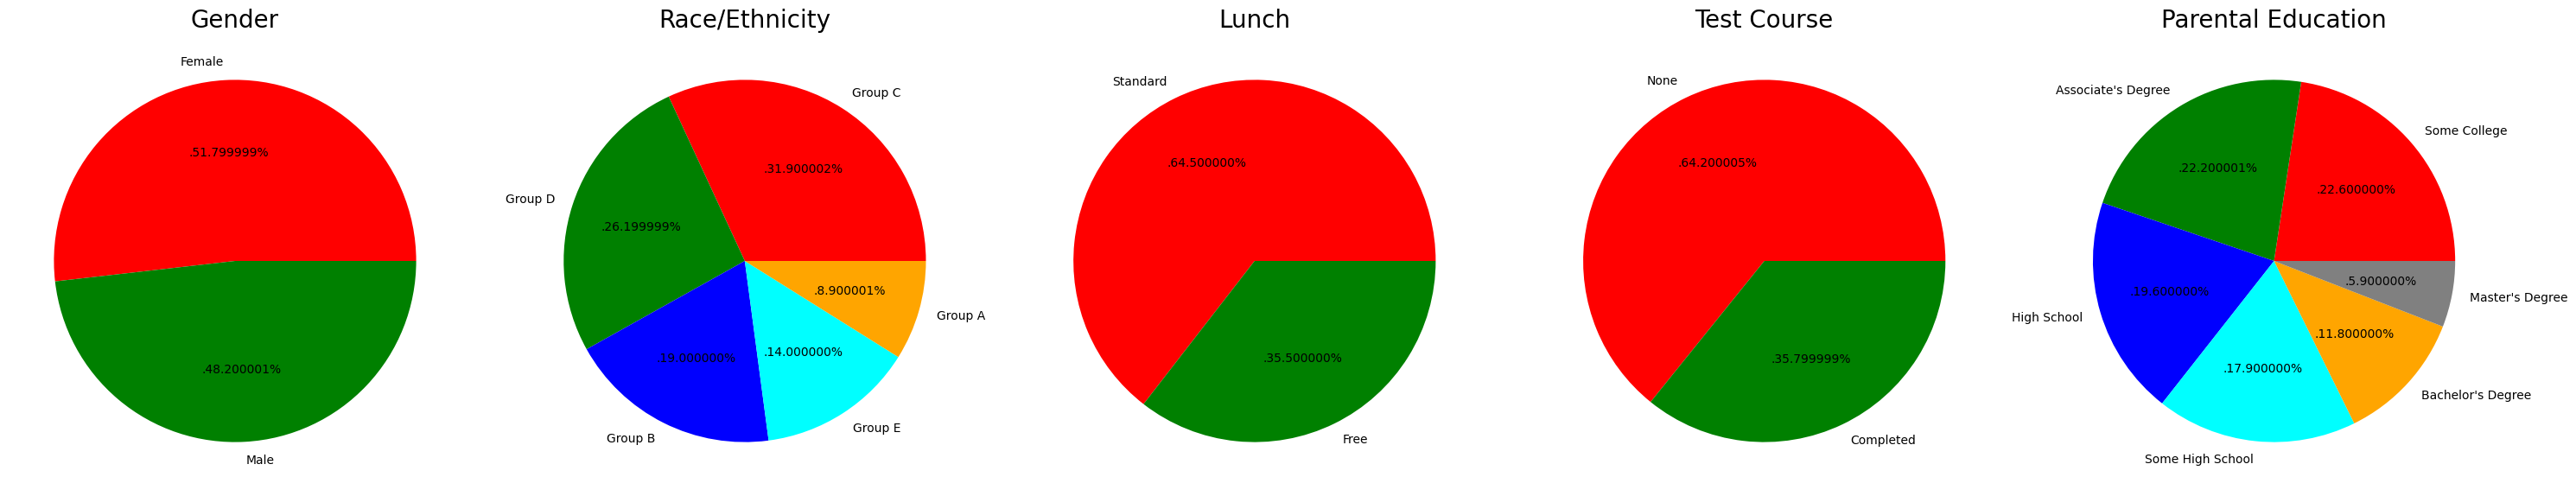

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

- Number of Male and Females are almost equal
- Number of students are greatest in Group C
- Number of students having standard lunch is greater
- Number of students who have not enrolled in any test preparation is greater